In [1]:
using Plots
using LinearAlgebra
using Printf
using LaTeXStrings

In [2]:
default(lw=2,markersize = 6,
    xtickfont=font(12), ytickfont=font(12), 
    guidefont=font(14), legendfont=font(12),titlefont=font(12))

In [13]:
a = 0;
b = 1;
n = 5;

x = LinRange(a,b,n+1)[2:end-1];
@show Δx = x[2] - x[1];

f = @. exp(x);

u_exact = @. 1 - exp(x) - x + exp(1) * x;

Δx = x[2] - x[1] = 0.2


In [14]:
A = zeros(n-1,n-1);

for i = 1:n-1
    # treat the first and last rows seperately
    if i==1
        A[1,1] = 2/Δx^2;
        A[1,2] = -1/Δx^2;
    elseif i==n-1
        A[n-1,n-2] = -1/Δx^2;
        A[n-1,n-1] = 2/Δx^2;
    else
        A[i,i-1] = -1/Δx^2;
        A[i,i] = 2/Δx^2;
        A[i,i+1] = -1/Δx^2;
    end

end


In [15]:
A

4×4 Matrix{Float64}:
  50.0  -25.0    0.0    0.0
 -25.0   50.0  -25.0    0.0
   0.0  -25.0   50.0  -25.0
   0.0    0.0  -25.0   50.0

In [16]:
u = A\f;

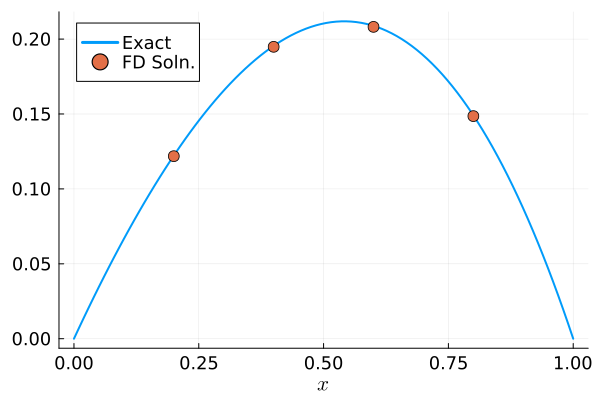

In [17]:
xx= LinRange(0,1,100);
u_exact = @. 1 - exp(xx) - xx + exp(1) * xx;
plot(xx,u_exact,label="Exact")
scatter!(x, u, label="FD Soln.")
xlabel!(L"x")

In [18]:
using Dierckx # gives 1D spline interpolation functions

In [25]:
u_linear = Spline1D([a; x; b], [0; u;0], k = 1) # degree 1 (linear interpolant)

Spline1D(knots=[0.0,0.2 … 0.8,1.0] (6 elements), k=1, extrapolation="nearest", residual=0.0)

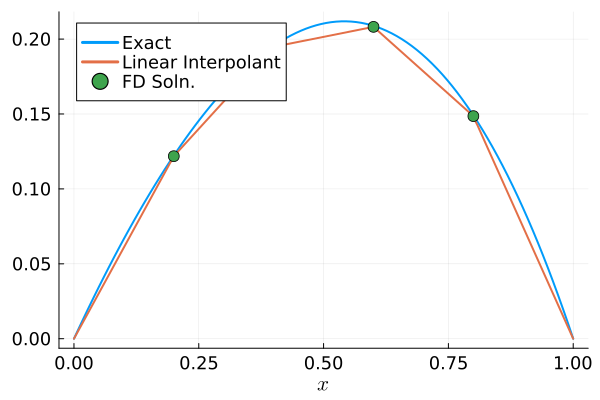

In [26]:
xx= LinRange(0,1,100);
u_exact = @. 1 - exp(xx) - xx + exp(1) * xx;
plot(xx,u_exact,label="Exact")
plot!(xx, u_linear.(xx), label="Linear Interpolant")
scatter!(x, u, label="FD Soln.")
xlabel!(L"x")

In [22]:
u_cubic = Spline1D([a; x; b], [0; u;0], k = 3)# degree 3 (cubic interpolant)

Spline1D(knots=[0.0, 0.4, 0.6, 1.0], k=3, extrapolation="nearest", residual=0.0)

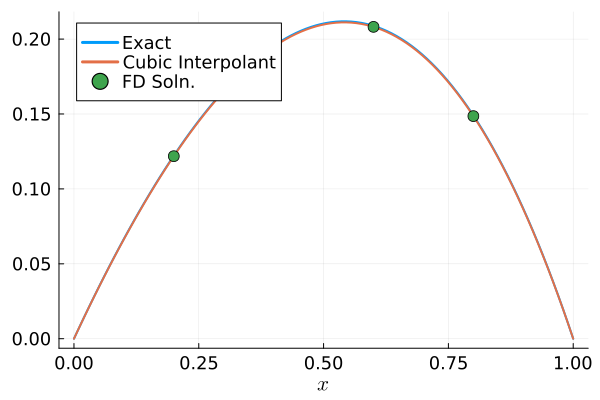

In [23]:
xx= LinRange(0,1,100);
u_exact = @. 1 - exp(xx) - xx + exp(1) * xx;
plot(xx,u_exact,label="Exact")
plot!(xx, u_cubic.(xx), label="Cubic Interpolant")
scatter!(x, u, label="FD Soln.")
xlabel!(L"x")